In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel('/Users/viney/Downloads/Walmart Sales.xlsx')

In [55]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Date', 'Time', 'Payment',
       'Rating', 'Revenue'],
      dtype='object')

In [4]:
# adding new column of Revenue 
df['Revenue'] = df['Unit price'] * df['Quantity']

In [6]:
df['Branch'].unique()

array(['A', 'B', 'C'], dtype=object)

In [7]:
# I've divided original table into 3 parts having 3 unique Brances using 3 differnt approaches.

In [8]:
dfa = df.where(df['Branch'] == 'A')

In [9]:
dfa.dropna(inplace=True)

In [10]:
dfb = df[df['Branch']=='B']

In [11]:
dfc = df[df['Branch'].isin(['C'])]

In [32]:
#total revenue by branch C
dfc['Revenue'].sum()

96257.19

In [33]:
#total revenue by branch B
dfb['Revenue'].sum()

107567.19

In [34]:
#total revenue by branch A
dfa['Revenue'].sum()

103763.0

In [28]:
City_grp = df.groupby(['City'])

# Analysis of sales and revenue at the city and branch level

In [81]:
#total revnue by branch A in different cities
dfa.groupby('City')['Revenue'].sum()


City
Mandalay     637.0
Naypyitaw    648.0
Yangon       598.0
Name: Quantity, dtype: float64

In [82]:
#total sales by branch A in different cities
dfa.groupby('City')['Quantity'].sum()

City
Mandalay     637.0
Naypyitaw    648.0
Yangon       598.0
Name: Quantity, dtype: float64

In [79]:
#total revnue by branch B in different cities
dfb.groupby('City')['Revenue'].sum()


City
Mandalay     37215.93
Naypyitaw    35157.75
Yangon       35193.51
Name: Revenue, dtype: float64

In [83]:
#total sales by branch B in different cities
dfa.groupby('City')['Quantity'].sum()

City
Mandalay     637.0
Naypyitaw    648.0
Yangon       598.0
Name: Quantity, dtype: float64

In [39]:
#total revnue by branch C in different cities
dfb.groupby('City')['Revenue'].sum()

City
Mandalay     29794.62
Naypyitaw    34160.14
Yangon       32302.43
Name: Revenue, dtype: float64

In [84]:
#total sales by branch C in different cities
dfc.groupby('City')['Quantity'].sum()

City
Mandalay     519
Naypyitaw    579
Yangon       630
Name: Quantity, dtype: int64

In [41]:
#total revnue in different cities
df.groupby('City')['Revenue'].sum()

City
Mandalay     101140.64
Naypyitaw    105303.53
Yangon       101143.21
Name: Revenue, dtype: float64

In [56]:
city_branch_revenue = df.groupby(['City', 'Branch'])['Revenue'].sum()

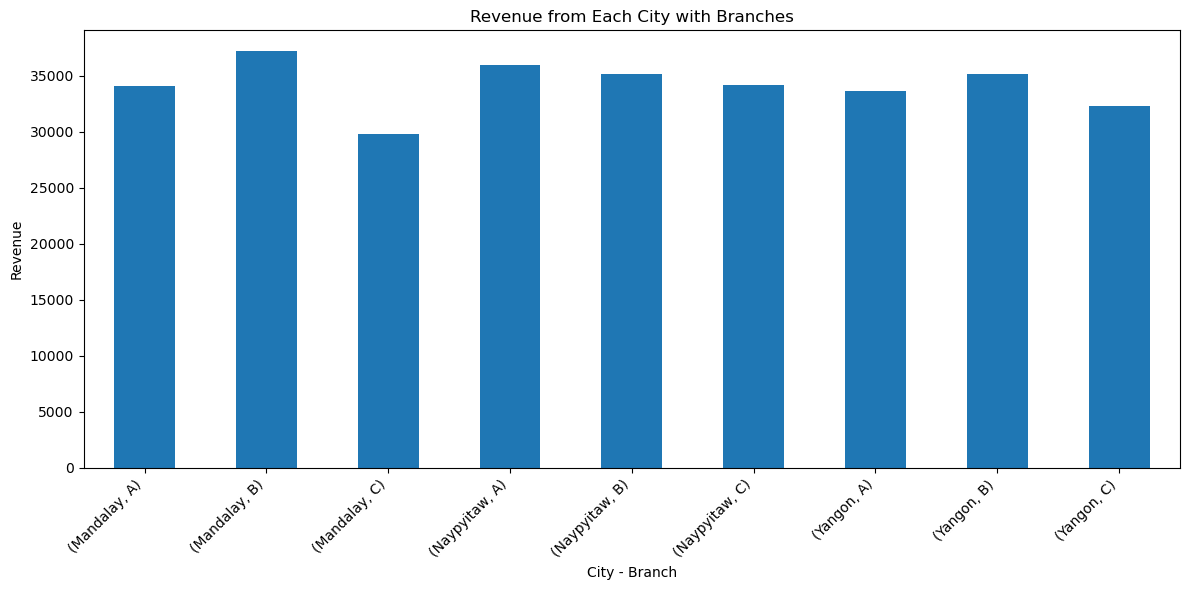

In [57]:
plt.figure(figsize=(12, 6))
city_branch_revenue.plot(kind='bar', x='Branch', y='Revenue', figsize=(12, 6), legend=False)
plt.title('Revenue from Each City with Branches')
plt.xlabel('City - Branch')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [106]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Time,Payment,Rating,Revenue,Date,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,13:08:00,Ewallet,9.1,522.83,2019-01-05,1
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,10:29:00,Cash,9.6,76.40,2019-03-08,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,13:23:00,Credit card,7.4,324.31,2019-03-03,3
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,20:33:00,Ewallet,8.4,465.76,2019-01-27,1
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,10:37:00,Ewallet,5.3,604.17,2019-02-08,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,A,Naypyitaw,Normal,Male,Health and beauty,40.35,1,13:46:00,Ewallet,6.2,40.35,2019-01-29,1
996,303-96-2227,A,Mandalay,Normal,Female,Home and lifestyle,97.38,10,17:16:00,Ewallet,4.4,973.80,2019-03-02,3
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,13:22:00,Cash,7.7,31.84,2019-02-09,2
998,347-56-2442,B,Yangon,Normal,Male,Home and lifestyle,65.82,1,15:33:00,Cash,4.1,65.82,2019-02-22,2


# What is the average price of an item sold at each branch of the city

In [72]:
dfa.groupby('City')['Unit price'].mean()

City
Mandalay     53.353866
Naypyitaw    54.123182
Yangon       55.639298
Name: Unit price, dtype: float64

In [73]:
dfb.groupby('City')['Unit price'].mean()

City
Mandalay     56.133305
Naypyitaw    57.785688
Yangon       56.011062
Name: Unit price, dtype: float64

In [74]:
dfc.groupby('City')['Unit price'].mean()

City
Mandalay     57.958316
Naypyitaw    57.941009
Yangon       52.684602
Name: Unit price, dtype: float64

# Performance of sales and revenue, Month over Month across the Product Line, Gender, and Payment Method

In [103]:
df.dtypes

Invoice ID               object
Branch                   object
City                     object
Customer type            object
Gender                   object
Product line             object
Unit price              float64
Quantity                  int64
Time                     object
Payment                  object
Rating                  float64
Revenue                 float64
Date             datetime64[ns]
dtype: object

In [87]:
df['date'] = pd.to_datetime(df['Date'])

In [93]:
df.drop(columns=['Date'],inplace=True)

In [105]:
df['Month'] = df['Date'].dt.month

In [101]:
df.rename(columns={'date':'Date'},inplace=True)

In [164]:
grouped_df = df.groupby(['Month', 'Gender', 'Payment']).agg({'Quantity': 'sum', 'Revenue': 'sum'})

In [165]:
grouped_df

Quantity   Revenue
Month Gender Payment                        
1     Female Cash              395  21477.68
             Credit card       327  18733.30
             Ewallet           297  16111.86
      Male   Cash              313  18303.35
             Credit card       295  17692.01
             Ewallet           338  18435.96
2     Female Cash              376  21293.52
             Credit card       280  16088.60
             Ewallet           295  16270.79
      Male   Cash              220  12750.61
             Credit card       225  13778.09
             Ewallet           258  12408.27
3     Female Cash              233  13909.00
             Credit card       321  16129.00
             Ewallet           345  19874.75
      Male   Cash              359  19129.24
             Credit card       274  13547.64
             Ewallet           359  21653.71

In [122]:
grouped_df_month = df.groupby(['Month','Product line'])

In [167]:
a = grouped_df_month['Revenue'].sum()
b = grouped_df_month['Quantity'].sum()
result1 = pd.concat([a, b], axis=1)

In [168]:
result1

Revenue  Quantity
Month Product line                              
1     Electronic accessories  17934.56       333
      Fashion accessories     18423.92       336
      Food and beverages      18638.60       325
      Health and beauty       15603.02       254
      Home and lifestyle      19518.80       342
      Sports and travel       20635.26       375
2     Electronic accessories  16536.10       313
      Fashion accessories     18104.63       295
      Food and beverages      19047.96       349
      Health and beauty       13906.91       266
      Home and lifestyle      11842.27       205
      Sports and travel       13152.01       226
3     Electronic accessories  17279.37       325
      Fashion accessories     15191.35       271
      Food and beverages      15784.72       278
      Health and beauty       17341.25       334
      Home and lifestyle      19935.99       364
      Sports and travel       18710.66       319

In [156]:
grouped_df_month_b = df.groupby(['Month','Gender'])

In [169]:
c = grouped_df_month_b['Revenue'].sum()
d = grouped_df_month_b['Quantity'].sum()
result2 = pd.concat([c, d], axis=1)

In [170]:
result2

Revenue  Quantity
Month Gender                    
1     Female  56322.84      1019
      Male    54431.32       946
2     Female  53652.91       951
      Male    38936.97       703
3     Female  49912.75       899
      Male    54330.59       992

In [161]:
grouped_df_month_c = df.groupby(['Month','Payment'])

In [172]:
e = grouped_df_month_c['Revenue'].sum()
f = grouped_df_month_c['Quantity'].sum()
result3 = pd.concat([e, f], axis=1)

In [173]:
result3

Revenue  Quantity
Month Payment                        
1     Cash         39781.03       708
      Credit card  36425.31       622
      Ewallet      34547.82       635
2     Cash         34044.13       596
      Credit card  29866.69       505
      Ewallet      28679.06       553
3     Cash         33038.24       592
      Credit card  29676.64       595
      Ewallet      41528.46       704

In [187]:
df.groupby(['Product line'])['Revenue'].sum()

Product line
Electronic accessories    51750.03
Fashion accessories       51719.90
Food and beverages        53471.28
Health and beauty         46851.18
Home and lifestyle        51297.06
Sports and travel         52497.93
Name: Revenue, dtype: float64

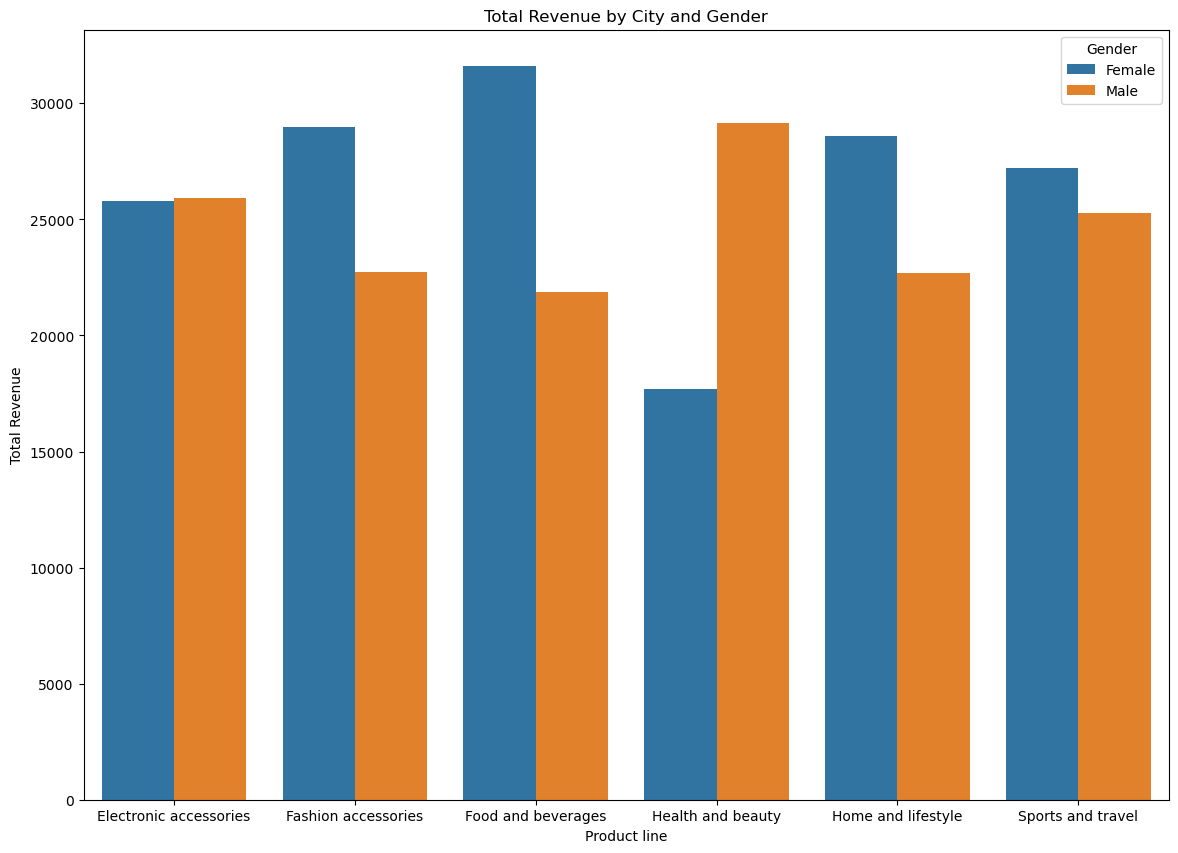

In [212]:
city_gender_grouped = df.groupby(['Product line', 'Gender']).agg({
    'Revenue': 'sum',
    'Quantity': 'sum',
    'Rating': 'mean'
}).reset_index()

# Create a bar plot with total revenue on the y-axis
plt.figure(figsize=(14, 10))
sns.barplot(x='Product line', y='Revenue', hue='Gender', data=city_gender_grouped)
plt.title('Total Revenue by City and Gender')
plt.xlabel('Product line')
plt.ylabel('Total Revenue')
plt.legend(title='Gender')
plt.show()

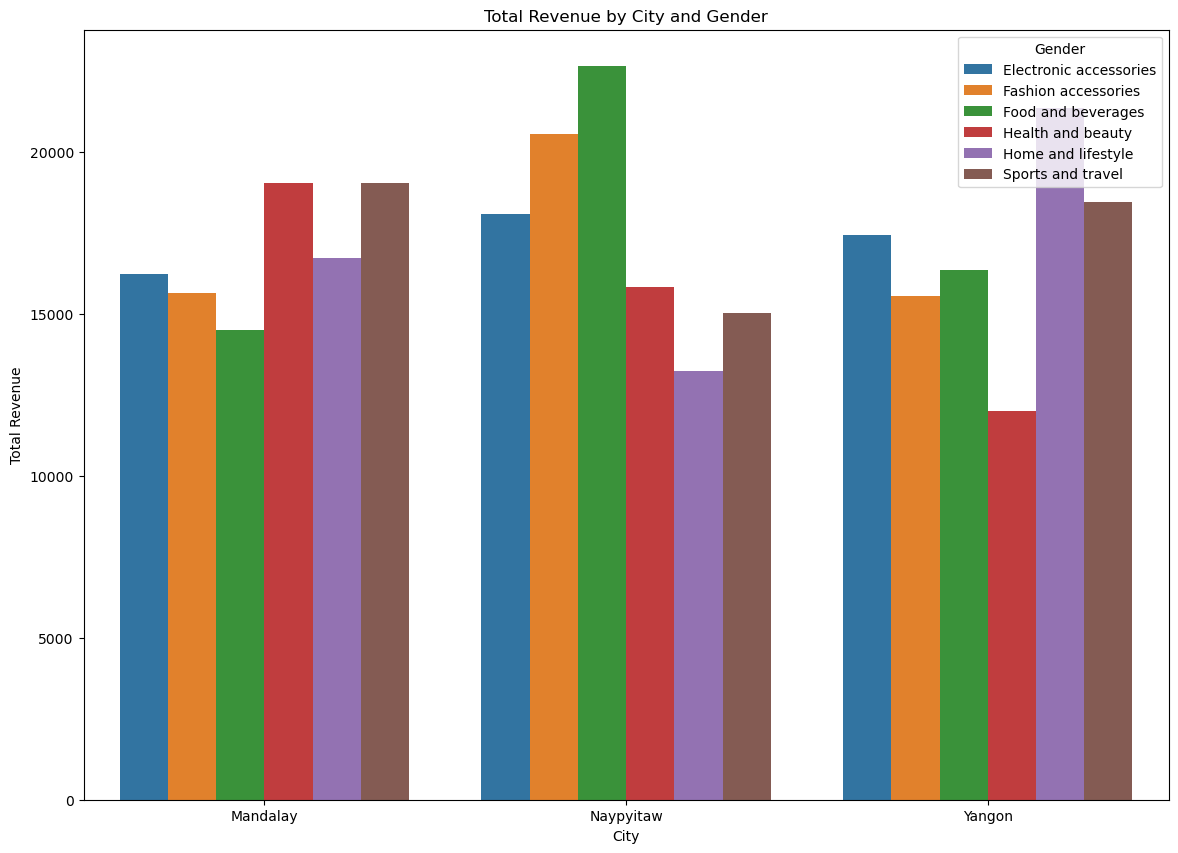

In [210]:
city_gender_grouped = df.groupby(['City', 'Product line']).agg({
    'Revenue': 'sum',
    'Quantity': 'sum',
    'Rating': 'mean'
}).reset_index()

# Create a bar plot with total revenue on the y-axis
plt.figure(figsize=(14, 10))
sns.barplot(x='City', y='Revenue', hue='Product line', data=city_gender_grouped)
plt.title('Total Revenue by City and Gender')
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.legend(title='Gender')
plt.show()

# Health and beauty sales is low in Yangon city, improvement in advertisement of product of health and beauty can be improved